In [1]:
# Set project home
PROJECT_HOME = "/home/akash/jobs/channel-flow"

In [2]:
# Import standard libraries
import os
import itertools
import numpy
import matplotlib.pyplot as pyplot

In [3]:
# Import boxkit library
import boxkit

In [4]:
dataFileDict = {
    "Reference" : PROJECT_HOME + os.sep + "simulation/OutflowTest2D/reference/INS_Channel_Flow_hdf5_plt_cnt_0200",
    "Outflow Buffer = 2.0" : PROJECT_HOME + os.sep + "simulation/OutflowTest2D/outflow/buffer20/INS_Channel_Flow_hdf5_plt_cnt_0200"
}

In [5]:
def getDatasetDict(dataFileDict):
    """
    Arguments
    ---------
    dataFileDict
    
    Returns
    -------
    dataDict
    """
    dataDict = {}
    
    for dataKey, dataFile in dataFileDict.items():
        dataDict.update({dataKey : boxkit.read_dataset(dataFile, source="flash")})
    
    return dataDict

In [6]:
dataDict = getDatasetDict(dataFileDict)

In [7]:
def plotVelProfile(figure, dataDict, xloc):
    """
    Arguments
    ---------
    velProfileDict
    xloc
    """
    velProfileDict = getVelProfileDict(dataDict, xloc)
    
    exactSolution = {
        "yloc" : numpy.linspace(-.5,.5,20),
        "velx" : exactVelProfile(numpy.linspace(-.5,.5,20)),
    }
    
    velProfileDict.update({"Exact" : exactSolution})
    
    # Create a figure object and set styling font/text options. Request latex
    pyplot.rc("font", family="serif", size=15, weight="bold")
    pyplot.rc("axes", labelweight="bold", titleweight="bold")
    pyplot.rc("text", usetex=True)

    # Set marker and linestyle list
    marker = itertools.cycle(("o", "s", "d", ".", "*"))
    linestyle = itertools.cycle(("-", "--", "-."))

    # create a subfigure object
    ax = figure.add_subplot()

    # Loop over result list and extract invidual values from slices
    for velProfile in list(velProfileDict.values()):

        # Do the actual plot cycle through marker and linestyles defined earlier
        ax.plot(
        velProfile["velx"] / numpy.max(velProfile["velx"]),
        velProfile["yloc"],
        # marker=next(marker),
        # markevery=[0] + [*range(1, len(profile_loc) - 1, 10)] + [len(profile_loc) - 1],
        # markersize=5,
        linestyle=next(linestyle),
        )

    # Ticks and limits for x and y direction
    ax.set_xticks([0.0, 0.5, 1.0])
    ax.set_yticks([-0.5, 0.0, 0.5])

    # Set labels, title, and legend
    ax.set_xlabel(r"$u_1(x_2)/u_{1_{max}}$")
    ax.set_ylabel(r"$x_2/l_0$")
    ax.set_title(r"$x_1/l_0={0}$".format(xloc))
    ax.legend(list(velProfileDict.keys()))

    # Figure layout
    pyplot.tight_layout()

In [8]:
def getVelProfileDict(dataDict, xloc):
    """
    Arguments
    ---------
    dataDict
    xloc
    
    Returns
    -------
    velProfileDict
    """
    velProfileDict = {}
    eps = 1e-12
    
    for dataKey, dataSet in dataDict.items():

        dataSlice = boxkit.create_slice(dataSet, xmin=xloc-eps, xmax=xloc-eps)
        
        velx = numpy.array([])
        yloc = numpy.array([])
        
        for block in dataSlice.blocklist:
            # Get xindex corresponding to xloc. zindex is 0
            xindex = (numpy.abs(block.xrange("center") - xloc)).argmin()
            zindex = 0

            # Extract and append velocity and location values in y-direction
            yloc = numpy.append(yloc, block.yrange("center"))
            velx = numpy.append(velx, block["velx"][zindex, :, xindex])
        
        tempDict = {'yloc' : yloc, 'velx' : velx}
        velProfileDict.update({dataKey : tempDict})
        
    return velProfileDict

In [9]:
def exactVelProfile(yloc):
    """
    Arguments
    ---------
    yloc : array of y locations
    """
    return 1 - (2.0 * yloc) ** 2

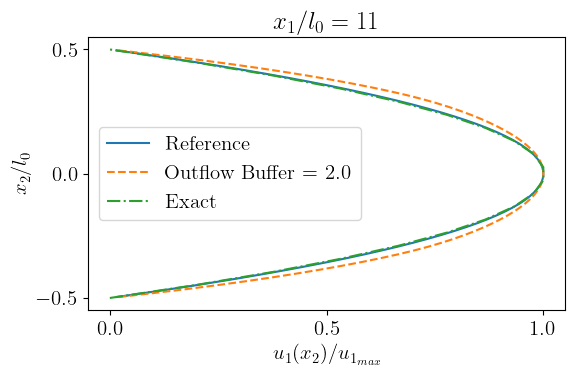

In [16]:
figure = pyplot.figure(figsize=(6, 4), dpi=100)
plotVelProfile(figure, dataDict, 11)